# Part 2: WordClouds


In this part, you will write functions that will help you create word clouds

## Text libraries: `textblob` and `nltk`

The citations for the journalists are text fragments that contain lots of spaces, punctuations, and we might be interested in cleaning them up, and finding interesting words and phrases in them.

To do that, we will use the Python library `textblob` which makes use of the `nltk` library. 

You might need to install these libraries before proceeding, depending on your Python installation. First test if you have them, then install them if you get an error.

In [37]:
import nltk, textblob

In [38]:
!pip install nltk

In [39]:
!pip install textblob

In [41]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
englishSW = stopwords.words('english') 
sorted(englishSW)[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeynoyalcin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

As with every text, the so-called stop-words are the most frequent. NLTK maintains list of stop words for many languages, let's get the English language:

##  Building a wordcloud to visualize text


Text is difficult to visualize, because most statistical charts are numerical data, or for a small set of categorical data. Meanwhile, our small set of citations had 1729 words. One way that has emerged to visualize text is the Word Cloud. In Python, there is a library that makes use of Matplotlib to automatically generate wordclouds. You'll need to install this library, if it's the first time using it.

In [4]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 3.5 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/st/p5m8k1hs47lbfn7mzlwgy56w0000gn/T/pip-install-gfec0qc1/wordcloud_0bc7663bfb0247f8825be64172edfe2c/setup.py'"'"'; __file__='"'"'/private/var/folders/st/p5m8k1hs47lbfn7mzlwgy56w0000gn/T/pip-install-gfec0qc1/wordcloud_0bc7663bfb0247f8825be64172edfe2c/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/st/p5m8k1hs47lbfn7mzlwgy56w0000gn/T/pip-wheel-k3clysv5
       cwd: /private/var/folders/st/p5m8k1hs47lbfn7mzlwgy56w0000gn/T/pip-install-gfec0qc1/wordcloud_0bc7663bfb0247f8825be64172edfe2c/
  Complete output (24 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating

In [15]:
!pip install requests

## Taylor Swift's World Cloud! 

In [18]:
import requests

In [19]:
from urllib import request
def getPageFromWiki(pageName):
    """Given a Wikipedia page name, returns a dictionary of key-values 
    parsed in various structures, such as text, sections, links, etc.
    """
    response = requests.get(
        'https://en.wikipedia.org/w/api.php',
         params={
             'action': 'parse',
             'page': pageName,
             'format': 'json',
        }).json()
    return response

In [45]:
Taylor = getPageFromWiki('Taylor_Swift')
print(Taylor)

{'parse': {'title': 'Taylor Swift', 'pageid': 5422144, 'revid': 1052199628, 'text': {'*': '<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">American singer-songwriter</div>\n<style data-mw-deduplicate="TemplateStyles:r1033289096">.mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}</style><div role="note" class="hatnote navigation-not-searchable">For her self-titled debut album, see <a href="/wiki/Taylor_Swift_(album)" title="Taylor Swift (album)">Taylor Swift (album)</a>.</div>\n<p class="mw-empty-elt">\n\n\n\n</p>\n<style data-mw-deduplicate="TemplateStyles:r1048617464">.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infob

In [55]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
# url of Taylor Swift 
source = urlopen('https://en.wikipedia.org/wiki/Taylor_Swift').read()
soup = BeautifulSoup(source,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Taylor Swift - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fea0370a-7eb4-4038-a303-499096621dcb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Taylor_Swift","wgTitle":"Taylor Swift","wgCurRevisionId":1052199628,"wgRevisionId":1052199628,"wgArticleId":5422144,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 German-language sources (de)","CS1 Portuguese-language sources (pt)","CS1 maint: numeric names: authors list","CS1 Spanish-language sources (es)","Articles with short

In [57]:
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text
    
text

'\nTaylor Alison Swift (born December 13, 1989) is an American singer-songwriter. Her narrative songwriting, which is often inspired by her personal life, has received widespread media coverage and critical praise. Born in West Reading, Pennsylvania, Swift relocated to Nashville, Tennessee, at the age of 14 to pursue a career in country music. She signed a songwriting deal with Sony/ATV Music Publishing in 2004 and a recording deal with Big Machine Records in 2005, and released her eponymous debut studio album in 2006.\nShe explored country pop on her second and third studio albums, Fearless (2008) and Speak Now (2010). The success of the former\'s singles "Love Story" and "You Belong with Me" on both country and pop radio established Swift as a leading crossover artist. She experimented further with pop, rock, and electronic genres on her fourth studio album, Red (2012). Her fifth, the synth-pop album 1989 (2014), effectively transformed her status from country songstress to pop star,

In [59]:
# Import package
import re
# Clean text
text = re.sub(r'\[.*?\]+', '', text)
Taylor = text.replace('\n', '')
Taylor

'Taylor Alison Swift (born December 13, 1989) is an American singer-songwriter. Her narrative songwriting, which is often inspired by her personal life, has received widespread media coverage and critical praise. Born in West Reading, Pennsylvania, Swift relocated to Nashville, Tennessee, at the age of 14 to pursue a career in country music. She signed a songwriting deal with Sony/ATV Music Publishing in 2004 and a recording deal with Big Machine Records in 2005, and released her eponymous debut studio album in 2006.She explored country pop on her second and third studio albums, Fearless (2008) and Speak Now (2010). The success of the former\'s singles "Love Story" and "You Belong with Me" on both country and pop radio established Swift as a leading crossover artist. She experimented further with pop, rock, and electronic genres on her fourth studio album, Red (2012). Her fifth, the synth-pop album 1989 (2014), effectively transformed her status from country songstress to pop star, sup

In [28]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158019 sha256=48a347f516b34ee033feb167617b9acd3ffd25493cce561fab7ac137056ca562
  Stored in directory: /Users/zeynoyalcin/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [29]:
from textblob import TextBlob
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

In [62]:
def makeWorldCloudFromWiki(wcloudObj):
    """Simple function to plot the wordcloud"""
    plt.figure() 
    plt.imshow(wcloudObj, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show() 

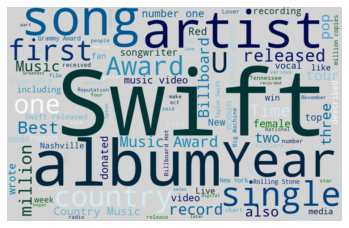

In [63]:
wcloud_Taylor = WordCloud(stopwords=englishSW, width=750, height=480, 
                   max_words=100, colormap='ocean', 
                   background_color='lightgray').generate(Taylor)
makeWorldCloudFromWiki(wcloud_Taylor)

In [75]:
wcloud_Taylor.to_file("Taylor Swift.png")

## Lady Gaga's World Cloud! 

In [68]:
source = urlopen('https://en.wikipedia.org/wiki/Lady_Gaga').read()
soup = BeautifulSoup(source,'lxml')

In [69]:
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [76]:
text = re.sub(r'\[.*?\]+', '', text)
Gaga = text.replace('\n', '')

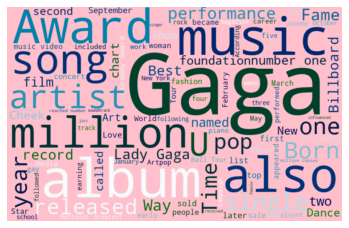

In [72]:
wcloud_Gaga = WordCloud(stopwords=englishSW, width=750, height=480, 
                   max_words=100, colormap='ocean', 
                   background_color='pink').generate(Gaga)
makeWorldCloudFromWiki(wcloud_Gaga)

In [74]:
wcloud_Gaga.to_file("Lady Gaga.png")

## Alicia Keys' World Cloud! 

In [78]:
source = urlopen('https://en.wikipedia.org/wiki/Alicia_Keys').read()
soup = BeautifulSoup(source,'lxml')

In [79]:
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [80]:
text = re.sub(r'\[.*?\]+', '', text)
Alicia = text.replace('\n', '')

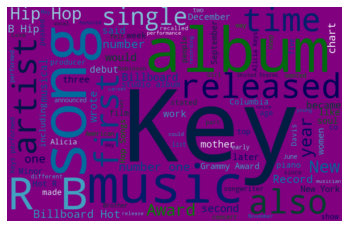

In [86]:
wcloud_Alicia = WordCloud(stopwords=englishSW, width=750, height=480, 
                   max_words=100, colormap='ocean', 
                   background_color='purple').generate(Alicia)
makeWorldCloudFromWiki(wcloud_Alicia)

In [87]:
wcloud_Alicia.to_file("Alicia Keys.png")

## Mariah Carey's World Cloud! 

In [92]:
source = urlopen('https://en.wikipedia.org/wiki/Mariah_Carey').read()
soup = BeautifulSoup(source,'lxml')

In [93]:
text = ''
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [94]:
text = re.sub(r'\[.*?\]+', '', text)
Mariah = text.replace('\n', '')

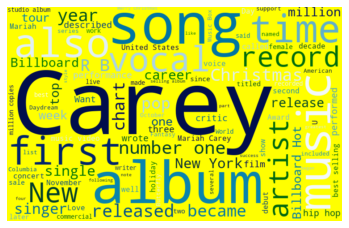

In [95]:
wcloud_Mariah = WordCloud(stopwords=englishSW, width=750, height=480, 
                   max_words=100, colormap='ocean', 
                   background_color='yellow').generate(Mariah)
makeWorldCloudFromWiki(wcloud_Mariah)

In [96]:
wcloud_Mariah.to_file("Mariah Carey.png")